### Warm up
## Stochastic Matrix

exercises from: https://github.com/fastai/numerical-linear-algebra

In [1]:
from sympy.matrices import Matrix
import sympy as sym
import numpy as np

In [2]:
M = Matrix([[0.90,0.07,0.02,0.01],
            [0,0.93,0.05,0.02],
            [0,0,0.85,0.15],
            [0,0,0,1.00]])
H = Matrix([0.85,0.10,0.05,0.00])
display(H)
display(M)

Matrix([
[0.85],
[ 0.1],
[0.05],
[ 0.0]])

Matrix([
[0.9, 0.07, 0.02, 0.01],
[  0, 0.93, 0.05, 0.02],
[  0,    0, 0.85, 0.15],
[  0,    0,    0,  1.0]])

In [3]:
R=H.T*M
display(R)

Matrix([[0.765, 0.1525, 0.0645, 0.018]])

In [4]:
M.T*H

Matrix([
[ 0.765],
[0.1525],
[0.0645],
[ 0.018]])

In [5]:
(H.T*M).T

Matrix([
[ 0.765],
[0.1525],
[0.0645],
[ 0.018]])

## Matrix-Matrix Products

In [6]:
k = Matrix([sym.symbols('roll bun cake bread')])
P = Matrix([[6,5,3,1],[3,6,2,2],[3,4,3,1]])
S = Matrix([[1.50,1.00],[2.00,2.50],
            [5.00,4.50],[16.00,17.00]])
P*S

Matrix([
[50.0, 49.0],
[58.5, 61.0],
[43.5, 43.5]])

In [7]:
P = np.array([[6,5,3,1],[3,6,2,2],[3,4,3,1]])
S = np.array([[1.50,1.00],[2.00,2.50],
            [5.00,4.50],[16.00,17.00]])
P@S

array([[50. , 49. ],
       [58.5, 61. ],
       [43.5, 43.5]])

## FP

In [8]:
def f(x):
    if x <= 1/2:
        return 2*x
    if x > 1/2:
        return 2*x-1
x=1/10
for i in range(80):
    print(x)
    x=f(x)

0.1
0.2
0.4
0.8
0.6000000000000001
0.20000000000000018
0.40000000000000036
0.8000000000000007
0.6000000000000014
0.20000000000000284
0.4000000000000057
0.8000000000000114
0.6000000000000227
0.20000000000004547
0.40000000000009095
0.8000000000001819
0.6000000000003638
0.2000000000007276
0.4000000000014552
0.8000000000029104
0.6000000000058208
0.20000000001164153
0.40000000002328306
0.8000000000465661
0.6000000000931323
0.20000000018626451
0.40000000037252903
0.8000000007450581
0.6000000014901161
0.20000000298023224
0.4000000059604645
0.800000011920929
0.6000000238418579
0.20000004768371582
0.40000009536743164
0.8000001907348633
0.6000003814697266
0.20000076293945312
0.40000152587890625
0.8000030517578125
0.600006103515625
0.20001220703125
0.4000244140625
0.800048828125
0.60009765625
0.2001953125
0.400390625
0.80078125
0.6015625
0.203125
0.40625
0.8125
0.625
0.25
0.5
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [9]:
def f(x):
    if x <= sym.Rational(1,2):
        return 2*x
    if x > sym.Rational(1,2):
        return 2*x-1
x=sym.Rational(1,10)
for i in range(80):
    print(float(x))
    x=f(x)

0.1
0.2
0.4
0.8
0.6
0.2
0.4
0.8
0.6
0.2
0.4
0.8
0.6
0.2
0.4
0.8
0.6
0.2
0.4
0.8
0.6
0.2
0.4
0.8
0.6
0.2
0.4
0.8
0.6
0.2
0.4
0.8
0.6
0.2
0.4
0.8
0.6
0.2
0.4
0.8
0.6
0.2
0.4
0.8
0.6
0.2
0.4
0.8
0.6
0.2
0.4
0.8
0.6
0.2
0.4
0.8
0.6
0.2
0.4
0.8
0.6
0.2
0.4
0.8
0.6
0.2
0.4
0.8
0.6
0.2
0.4
0.8
0.6
0.2
0.4
0.8
0.6
0.2
0.4
0.8


In [10]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn import decomposition
from scipy import linalg
import matplotlib.pyplot as plt

In [11]:
%matplotlib inline
np.set_printoptions(suppress=True)

In [12]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
remove = ('headers', 'footers', 'quotes')
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=remove)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=remove)

In [13]:
newsgroups_train.filenames.shape, newsgroups_train.target.shape

((2034,), (2034,))

In [14]:
np.array(newsgroups_train.target_names)[newsgroups_train.target[:3]]

array(['comp.graphics', 'talk.religion.misc', 'sci.space'], dtype='<U18')

In [15]:
newsgroups_train.target[:10]

array([1, 3, 2, 0, 2, 0, 2, 1, 2, 1])

In [16]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [17]:
vectorizer = CountVectorizer(stop_words='english')
vectors = vectorizer.fit_transform(newsgroups_train.data).todense() # (documents, vocab)
vectors.shape #, vectors.nnz / vectors.shape[0], row_means.shape

(2034, 26576)

In [18]:
vocab = np.array(vectorizer.get_feature_names_out())

In [19]:
vocab[7000:7020]

array(['cosmonauts', 'cosmos', 'cosponsored', 'cost', 'costa', 'costar',
       'costing', 'costly', 'costruction', 'costs', 'cosy', 'cote',
       'couched', 'couldn', 'council', 'councils', 'counsel',
       'counselees', 'counselor', 'count'], dtype=object)

In [20]:
%time U, s, Vh = linalg.svd(vectors, full_matrices=False)

CPU times: user 2min 22s, sys: 22.3 s, total: 2min 44s
Wall time: 47.3 s


In [21]:
print(U.shape, s.shape, Vh.shape)

(2034, 2034) (2034,) (2034, 26576)


In [27]:
S=np.diag(s)
vectors_ = U@S@Vh

In [47]:
a = vectors
b = vectors_
np.array_equal(a,b), np.array_equiv(a,b), np.allclose(a,b)

(False, False, True)

In [51]:
np.linalg.norm(b-a) # L2 or Frobenius?

3.691053921626178e-12

In [65]:
# compare column with transpose
np.allclose(U.T@U, np.eye(U.shape[0])), np.allclose(Vh@Vh.T, np.eye(Vh.shape[0]))

(True, True)

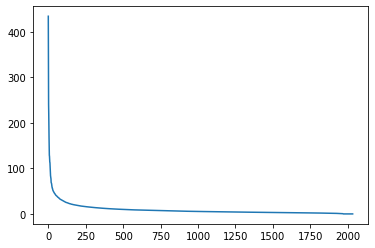

In [67]:
plt.plot(s)

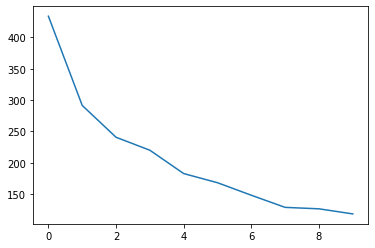

In [68]:
plt.plot(s[:10])